In [2]:
import sys
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from pathlib import Path
from scipy.signal import lfilter, firwin

sys.path.append('../src/')

from utils import libraries as lib

from bonsai import load_bonsai_config
load_bonsai_config(r"C:\Users\tiffany.ona\OneDrive - Allen Institute\Documents\VR foraging\aind-vr-foraging\Bonsai")


import harp
import harp.processing
import data_io

sns.set_context("talk")

In [13]:
path = r"Z:\699895\20231205T101957"
session = path[3:9]+'_'+path[10:25]
session_path = Path(path)
# session_path = Path(r"Z:\672103\20231010T104908")

# Harp Devices:
HarpBehavior = harp.HarpDevice("Behavior")
# Olfactometer = harp.HarpDevice("Olfactometer")
AnalogInput = harp.HarpDevice("AnalogInput")

harp_behavior_data = data_io.HarpSource(device=HarpBehavior, path=session_path / "Behavior.harp", name="behavior", autoload=False)
harp_olfactometer_data = data_io.HarpSource(device=HarpBehavior, path=session_path / "Olfactometer.harp", name="behavior", autoload=False)

# Software Events
software_events = data_io.SoftwareEventSource(path=session_path / "SoftwareEvents", name="software_events")
active_site = software_events.streams.ActiveSite.data
active_patch = software_events.streams.ActivePatch.data
# active_patch = software_events.streams.OdorControl.data
stopped = software_events.streams.GiveReward.data


In [14]:
harp_olfactometer_data.streams.keys()

odict_keys(['AssemblyVersion', 'Channel0ActualFlow', 'Channel0DutyCycle', 'Channel0Frequency', 'Channel0TargetFlow', 'Channel0UserCalibration', 'Channel1ActualFlow', 'Channel1DutyCycle', 'Channel1Frequency', 'Channel1TargetFlow', 'Channel1UserCalibration', 'Channel2ActualFlow', 'Channel2DutyCycle', 'Channel2Frequency', 'Channel2TargetFlow', 'Channel2UserCalibration', 'Channel3ActualFlow', 'Channel3DutyCycle', 'Channel3Frequency', 'Channel3Range', 'Channel3TargetFlow', 'Channel3UserCalibration', 'Channel3UserCalibrationAux', 'Channel4ActualFlow', 'Channel4DutyCycle', 'Channel4Frequency', 'Channel4TargetFlow', 'Channel4UserCalibration', 'ChannelsTargetFlow', 'ClockConfiguration', 'CoreVersionHigh', 'CoreVersionLow', 'DeviceName', 'DI0State', 'DI0Trigger', 'DigitalOutputClear', 'DigitalOutputSet', 'DigitalOutputState', 'DigitalOutputToggle', 'DO0Sync', 'DO1Sync', 'EnableEvents', 'EnableFlow', 'EnableValveExternalControl', 'EnableValvePulse', 'EndValve0PulseDuration', 'EndValve1PulseDurati

In [15]:
encoder_data = harp.read_harp_bin(harp_behavior_data.streams.AnalogData.path)


In [16]:
thermistordata = encoder_data[0]
thermistordata.index-=thermistordata.index[0]

In [17]:
thermistordata = thermistordata.reset_index()
thermistordata.rename(columns={0:'data', 'Seconds': 'seconds'}, inplace=True)

In [18]:
# thermistordata.data/=thermistordata.data.mean()

In [19]:
# # Apply moving average smoothing
smoothed_ther = lib.moving_average(thermistordata, window_size=5)

# Remove the 60Hz noise from the thermistor signal
smoothed_ther = lib.apply_filter(smoothed_ther, f_notch = 60, Q= 200)

# Remove Slow oscillations
slow_ther = lib.moving_average(smoothed_ther, window_size=100)
new_ther = smoothed_ther-slow_ther

press = lib.moving_average(press, window_size=3)

ValueError: object too deep for desired array

100 102


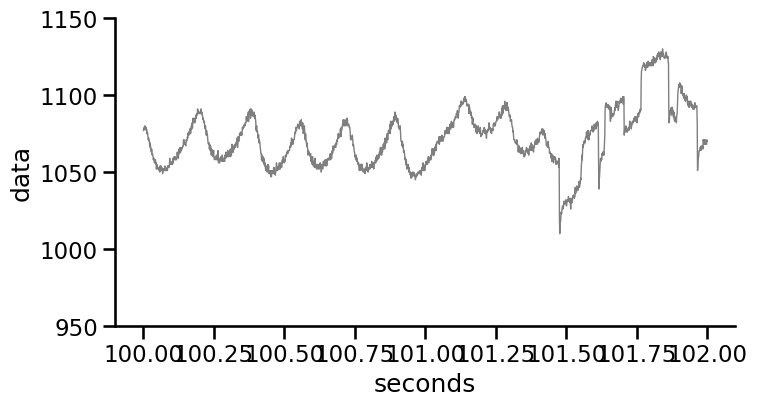

102 104


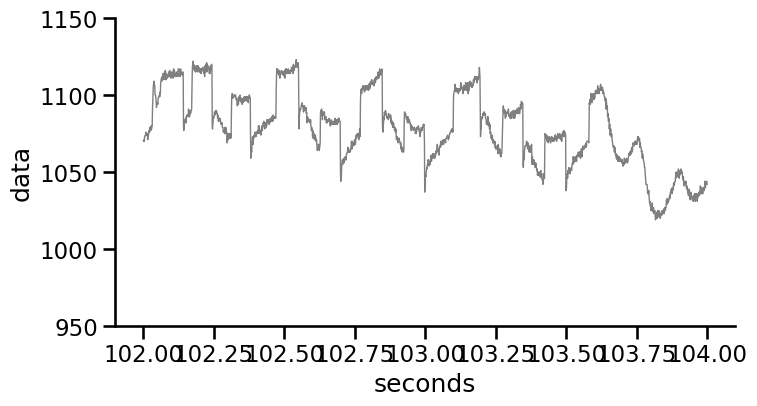

104 106


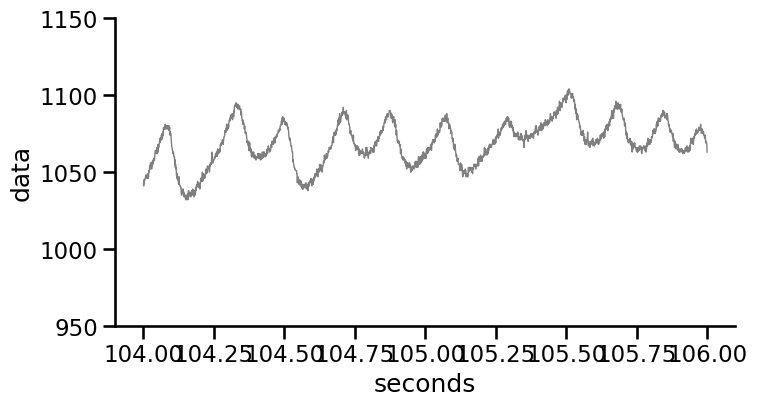

106 108


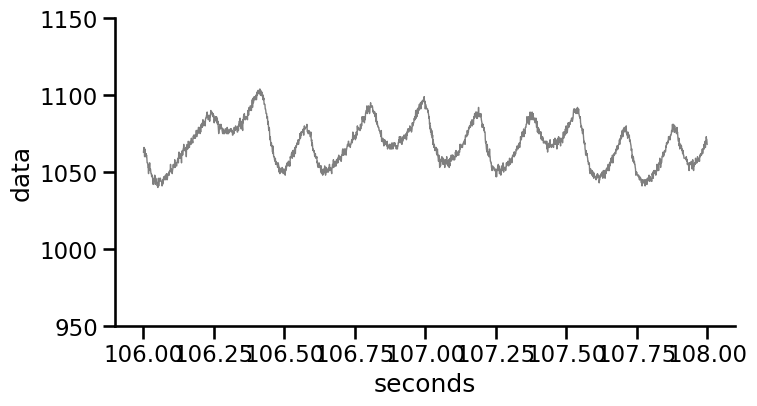

108 110


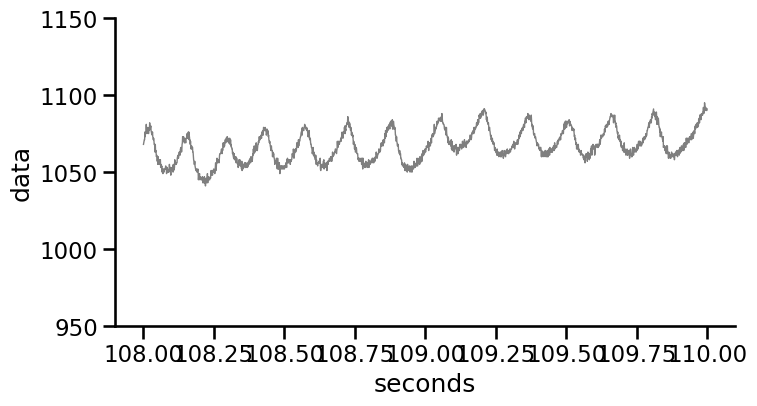

110 112


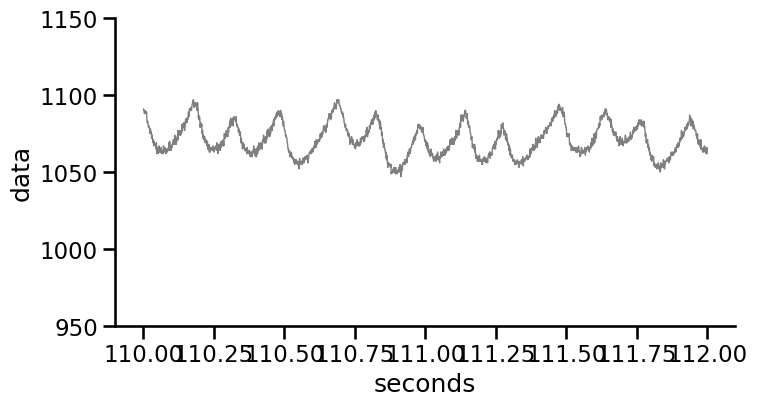

112 114


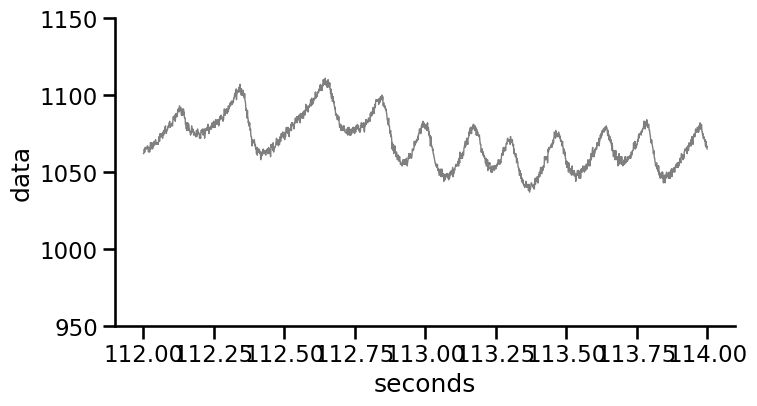

114 116


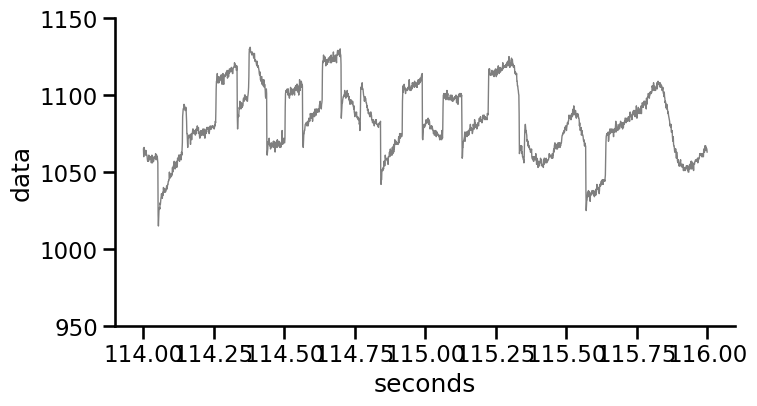

116 118


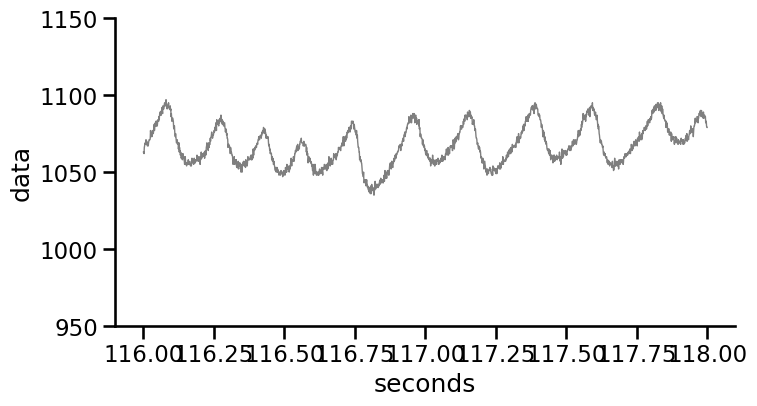

118 120


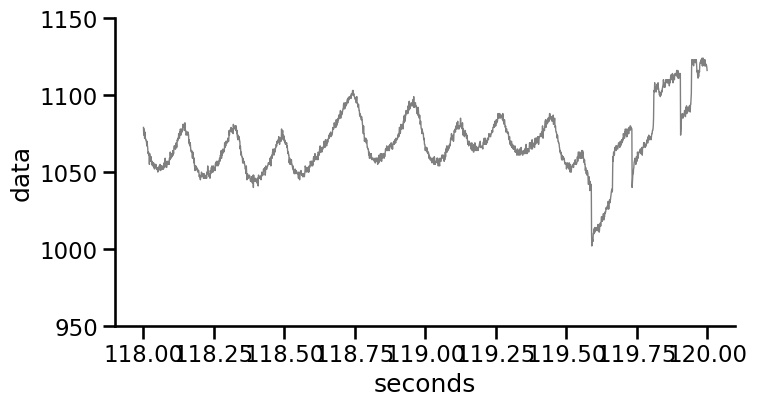

120 122


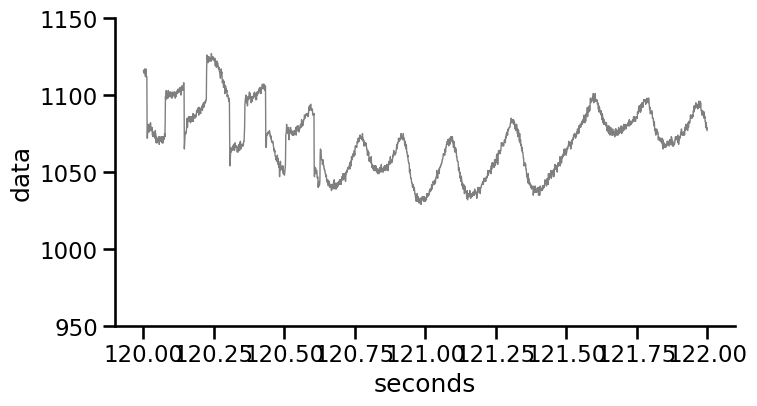

122 124


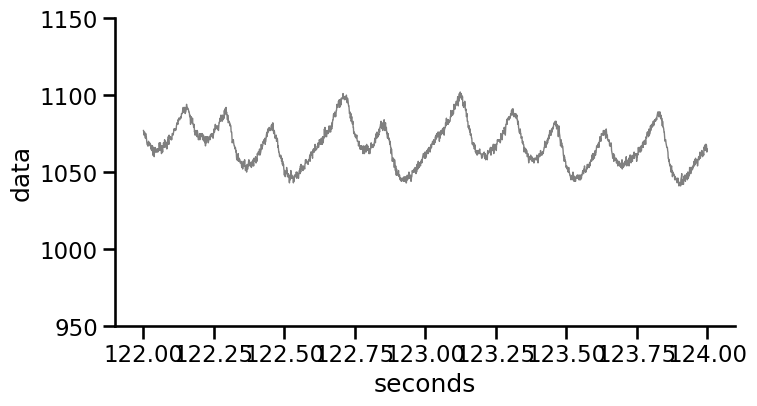

124 126


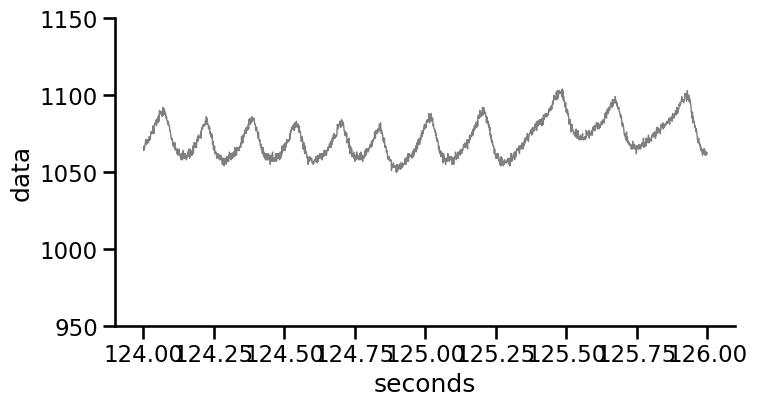

126 128


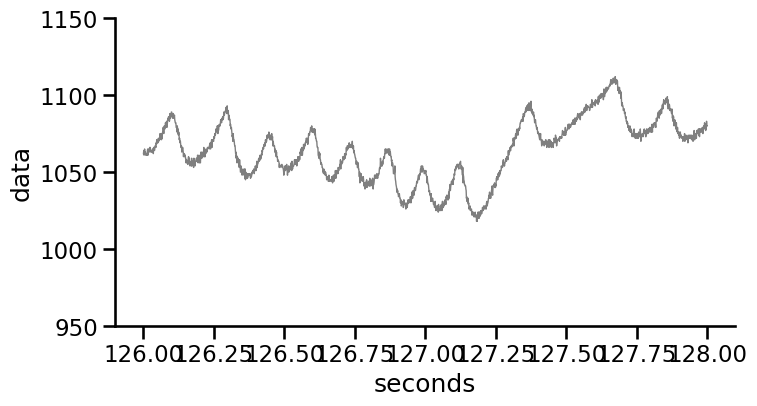

128 130


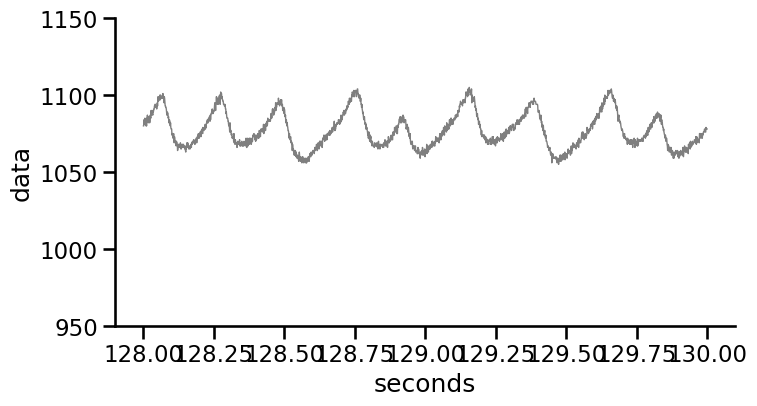

130 132


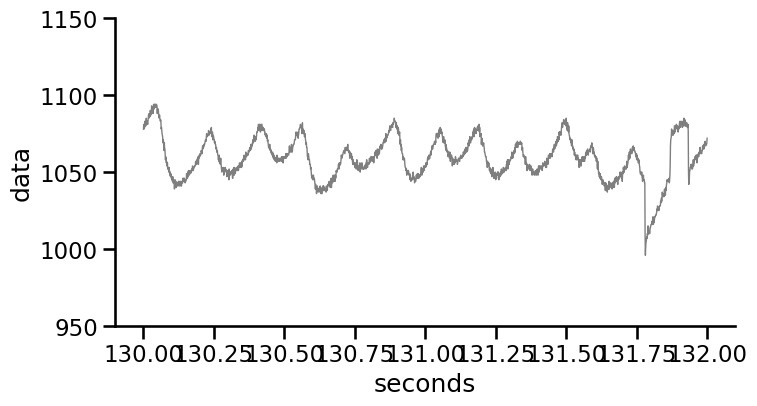

132 134


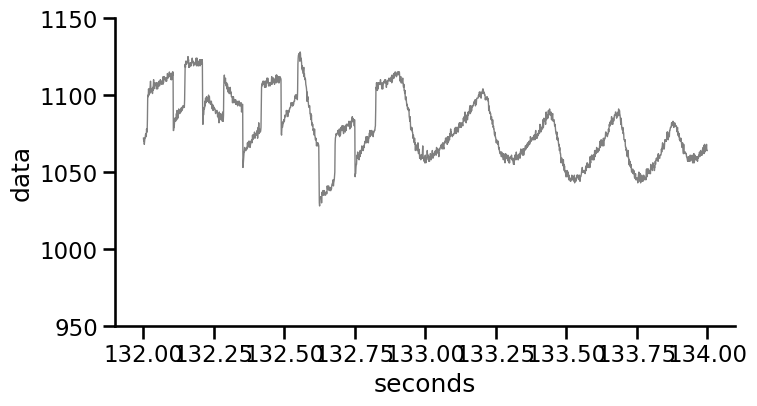

134 136


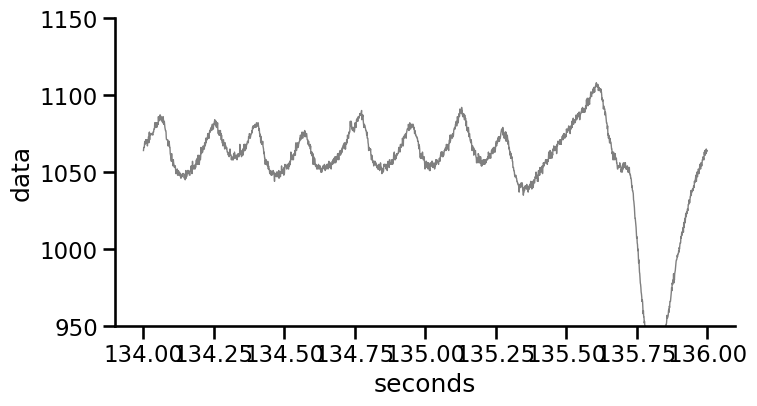

136 138


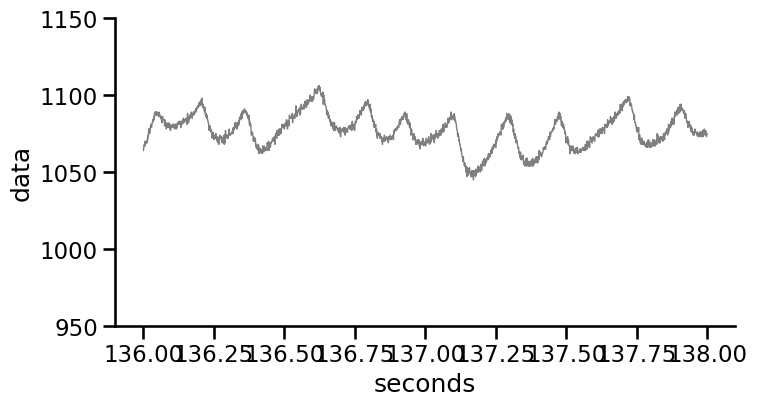

138 140


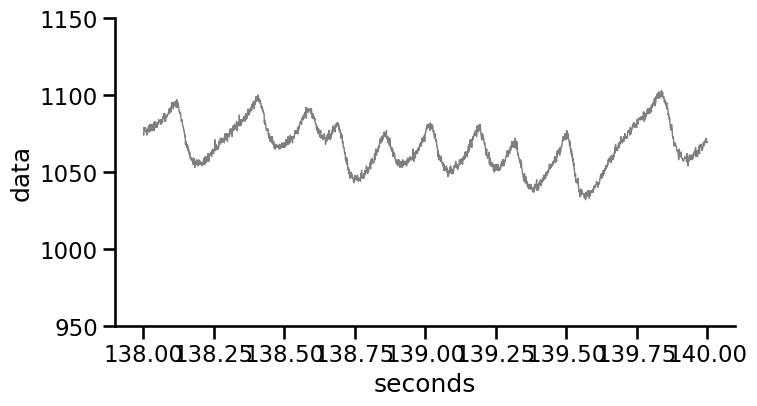

140 142


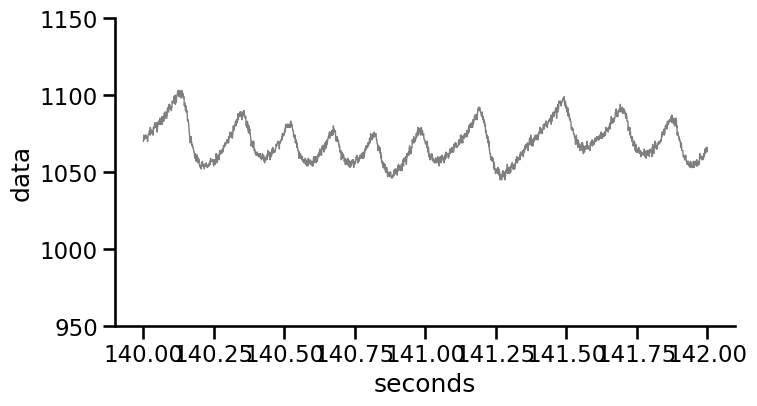

142 144


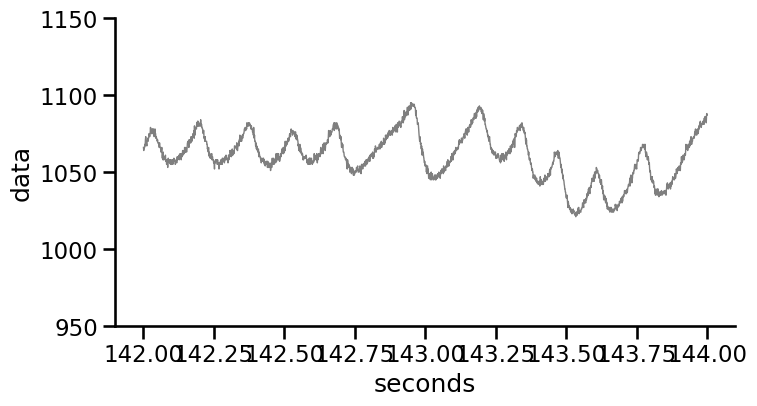

144 146


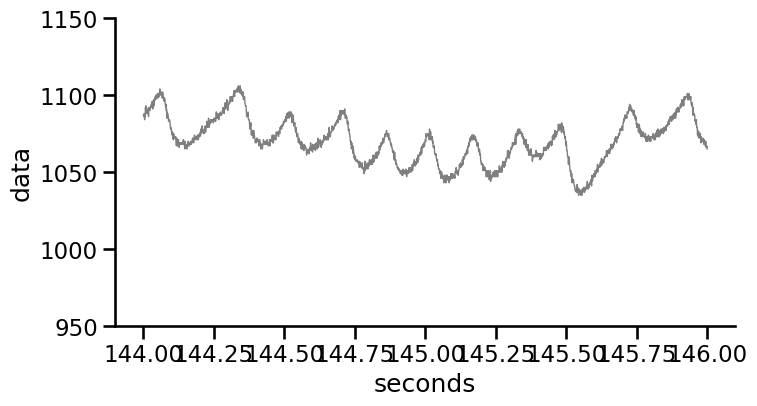

146 148


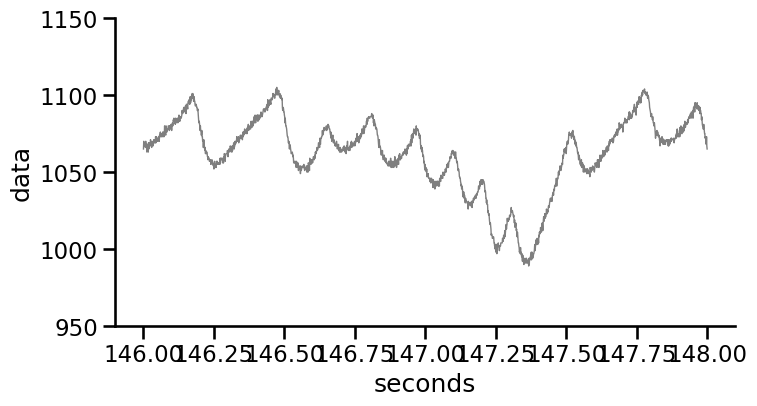

148 150


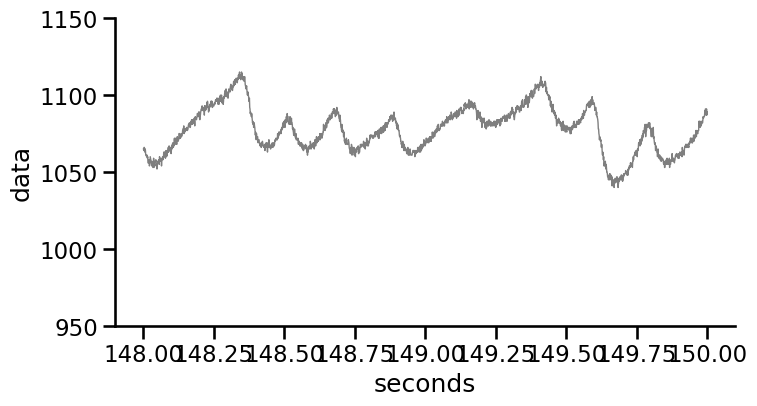

In [ ]:
for min_x, max_x in zip(range(100,150,2),range(102,152,2)):
    print(min_x, max_x)
    plt.figure(figsize=(8,4))
    sns.lineplot(x='seconds',y='data', data=thermistordata.loc[thermistordata.seconds.between(min_x,max_x)], color='k', alpha=0.5, linewidth=1)
    plt.ylim(950, 1150)
    sns.despine()
    plt.show()
    plt.close()